In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rcParams['text.usetex'] = True

In [4]:
data_dir = "./data/"

# Load and plot Hitomi data

## Let's start with the raw Hitomi data

In [6]:
masses_hitomi=np.load(data_dir + "masses_hitomi.npy")
TS_arr_hitomi=np.load(data_dir + "TS_arr_hitomi.npy")
UL_power_hitomi=np.load(data_dir + "UL_power_hitomi.npy")

Text(0, 0.5, '$\\sin^2(2\\theta)$')

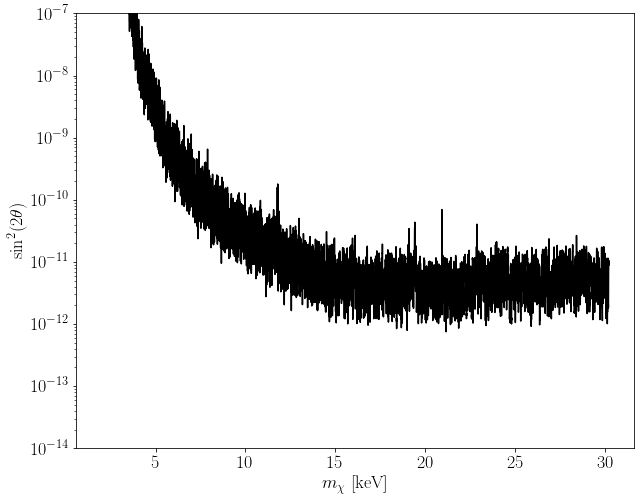

In [15]:
plt.figure(figsize=(10,8))
plt.plot(masses_hitomi,UL_power_hitomi,'k-')
plt.yscale('log')
plt.ylim(1e-14,1e-7)

plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.xlabel(r"$m_\chi$ [keV]",fontsize=18)
plt.ylabel(r"$\sin^2(2\theta)$",fontsize=18)

Text(0, 0.5, 'discovery TS')

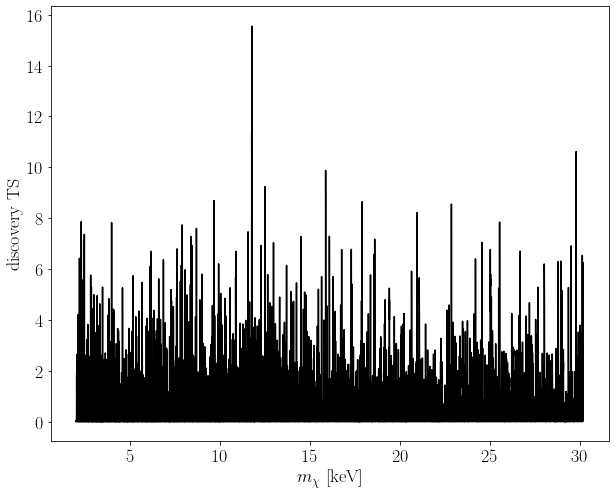

In [16]:
plt.figure(figsize=(10,8))
plt.plot(masses_hitomi,TS_arr_hitomi,'k-')


plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.xlabel(r"$m_\chi$ [keV]",fontsize=18)
plt.ylabel(r"discovery TS",fontsize=18)

## Now let's plot the smoothed Hitomi limit and the XRISM projections

In [41]:
# Hitomi smoothed data
masses_hitomi_smooth=np.load(data_dir + "masses_hitomi_smooth.npy")
UL_exp_hitomi_smooth=np.load(data_dir + "UL_exp_hitomi_smooth.npy")
UL_L1_hitomi_smooth=np.load(data_dir + "UL_L1_hitomi_smooth.npy")
UL_U1_hitomi_smooth=np.load(data_dir + "UL_U1_hitomi_smooth.npy")
UL_U2_hitomi_smooth=np.load(data_dir + "UL_U2_hitomi_smooth.npy") 
UL_power_hitomi_smooth=np.load(data_dir + "UL_power_hitomi_smooth.npy")

# XRISM projections
masses_xrism=np.load(data_dir + "masses_xrism.npy")
UL_exp_xrism=np.load(data_dir + "UL_exp_xrism.npy")
UL_L1_xrism=np.load(data_dir + "UL_L1_xrism.npy")
UL_U1_xrism=np.load(data_dir + "UL_U1_xrism.npy")
UL_U2_xrism=np.load(data_dir + "UL_U2_xrism.npy")

Text(0, 0.5, '$\\sin^2(2\\theta)$')

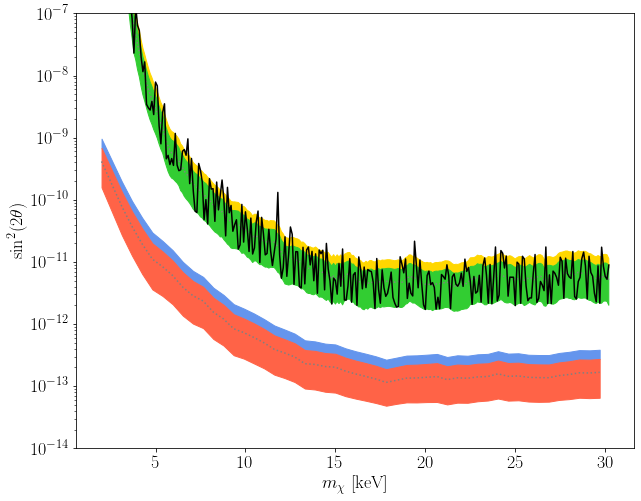

In [42]:
plt.figure(figsize=(10,8))
plt.fill_between(masses_hitomi_smooth,UL_U1_hitomi_smooth,UL_U2_hitomi_smooth,color="gold")
plt.fill_between(masses_hitomi_smooth,UL_L1_hitomi_smooth,UL_U1_hitomi_smooth,color="limegreen")
plt.plot(masses_hitomi_smooth,UL_exp_hitomi_smooth,color="grey",linestyle="dotted")
plt.plot(masses_hitomi_smooth,UL_power_hitomi_smooth,'k-')

plt.fill_between(masses_xrism,UL_U1_xrism,UL_U2_xrism,color="cornflowerblue")
plt.fill_between(masses_xrism,UL_L1_xrism,UL_U1_xrism,color="tomato")
plt.plot(masses_xrism,UL_exp_xrism,color="grey",linestyle="dotted")


plt.yscale('log')



plt.ylim(1e-14,1e-7)

plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.xlabel(r"$m_\chi$ [keV]",fontsize=18)
plt.ylabel(r"$\sin^2(2\theta)$",fontsize=18)

# Now, let's convert to liftime and ALP-photon coupling

In [31]:
def theta2tau(s2theta, ms):
    """ Convert from ms [keV] and sin2theta to lifetime [s]
    """
    
    return 1./(1.361e-29*(s2theta/1.e-7)*ms**5.)

hbar = 6.582119569e-16 # [eV.s]

def theta2gagg(s2theta, ms):
    """ Convert from ms [keV] and sin2theta to gagg [1/GeV]
    """
    
    Gamma = hbar/theta2tau(s2theta, ms)/2. # [eV]
    
    return np.sqrt(64.*np.pi*Gamma/(ms*1.e3)**3.)*1.e9 # [1/GeV]

## Let's illustrate and example, going to gagg and to lifetime

Text(0, 0.5, '$g_{a\\gamma\\gamma}$ [1/GeV]')

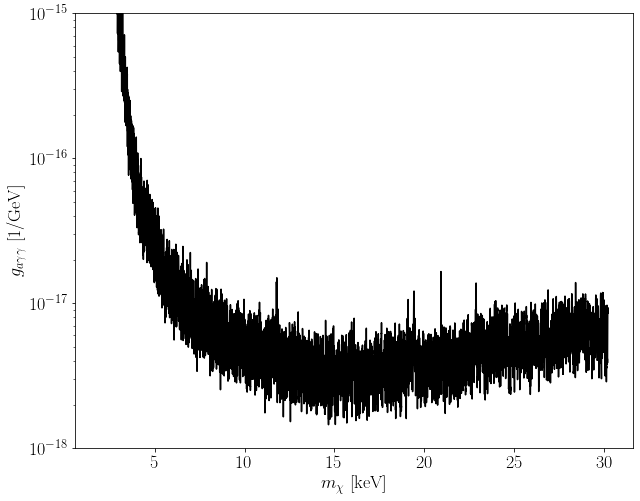

In [34]:
plt.figure(figsize=(10,8))
plt.plot(masses_hitomi,theta2gagg(UL_power_hitomi,masses_hitomi),'k-')
plt.yscale('log')
plt.ylim(1e-18,1e-15)

plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.xlabel(r"$m_\chi$ [keV]",fontsize=18)
plt.ylabel(r"$g_{a\gamma\gamma}$ [1/GeV]",fontsize=18)

Text(0, 0.5, '$\\tau_\\chi$ [s]')

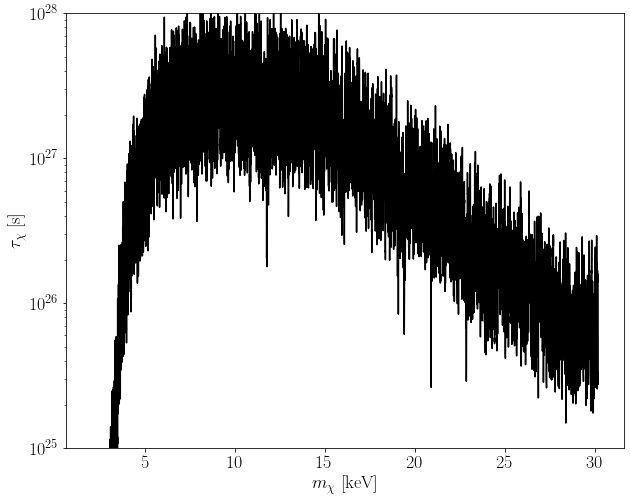

In [38]:
plt.figure(figsize=(10,8))
plt.plot(masses_hitomi,theta2tau(UL_power_hitomi,masses_hitomi),'k-')
plt.yscale('log')
plt.ylim(1e25,1e28)

plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.xlabel(r"$m_\chi$ [keV]",fontsize=18)
plt.ylabel(r"$\tau_\chi$ [s]",fontsize=18)